<a href="https://colab.research.google.com/github/JuliaPanov/Foram_analysis/blob/main/Y%3DPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##PREPARE DATA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

dfY= pd.read_csv('/content/Alport_Bowtie2_RSEM_expression_genes_QNThreshold5_LN_Filt3_CLASSES.txt', sep='\t')
dfX=pd.read_csv('/content/Alport_Bowtie2_RSEM_expression_genes_QNThreshold5_LN_Filt3_CLASSES.txt', sep='\t')

# Matrix Y
Y = dfY['Class_8classes']
#print(Y)
Y.shape

(32,)

In [ ]:
X = dfX.drop('Class_8classes', axis=1)
X.shape

(32, 15933)

In [ ]:
feature_list = list(X.columns)
#print(feature_list)

In [ ]:
print(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, stratify=Y)

In [ ]:
##UNBALANCED DATA --> imputation of data with SMOTE
#! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training set

smote = SMOTE(k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Split the data into training and testing sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
print(X_train_resampled)

In [ ]:
print(y_train_resampled)

In [ ]:
import collections
from collections import Counter

# Assuming y_train_resampled is your list or array
y_train_counts = Counter(y_train)

# Print the counts for each number
for number, count in y_train_counts.items():
    print(f"{number}: {count} times")

8: 3 times
2: 3 times
4: 3 times
5: 3 times
1: 2 times
7: 3 times
6: 3 times
3: 2 times


In [ ]:
print(X_test)

In [ ]:
print(y_test)

35    4
28    2
44    2
49    4
16    4
39    4
36    2
10    3
0     1
48    1
52    1
Name: Class, dtype: int64


In [ ]:
print(y_train)

12    4
51    2
3     2
25    2
7     3
50    2
14    4
19    1
1     2
32    2
22    2
45    2
24    2
23    2
42    2
8     2
2     2
53    2
15    3
31    1
5     3
46    1
18    3
41    2
54    4
6     2
27    2
43    2
37    4
4     4
9     4
11    2
40    2
38    1
13    2
21    4
34    2
17    2
20    2
26    2
47    4
33    2
29    1
30    2
Name: Class, dtype: int64


In [ ]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg4 = DecisionTreeRegressor()


reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)
reg3.fit(X_test, y_test)
reg4.fit(X_test, y_test)


ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3), ('dt', reg4)])
ereg.fit(X_test, y_test)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor())])

In [ ]:
##DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=3)

In [ ]:
DT_predict = DT.predict(X_test)

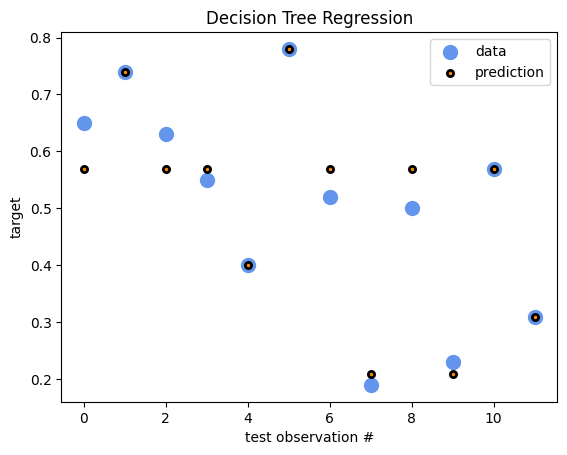

In [ ]:
import matplotlib.pyplot as plt
# Plot the results
x_ax = range(len(y_test))
plt.figure()
plt.scatter(x_ax, y_test, s=100, c="cornflowerblue", label="data")
plt.scatter(x_ax, DT_predict, s=20, edgecolor="black", color="darkorange", label="prediction", linewidth=2)
plt.xlabel("test observation #")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 922.7 kB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


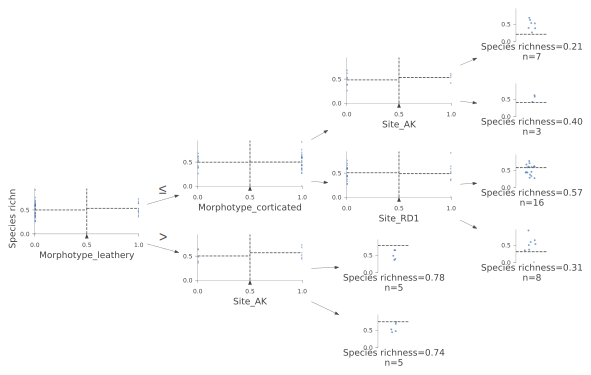

In [ ]:
# import export_graphviz
! pip install dtreeviz
from sklearn.tree import export_graphviz
import dtreeviz
from dtreeviz.trees import *

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(DT, out_file ='tree.dot',
               feature_names =feature_list)

viz_rmodel = dtreeviz.model(model=DT,
                            X_train=X_train,
                            y_train=y_train,
                            feature_names=feature_list,
                            target_name="Species richness")
viz_rmodel.view(orientation="LR")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = DT.feature_importances_

importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df
print(importance_df)
importance_df.to_csv('DecisionTreeRegressor_FeatureImportance.txt', index=True, sep='\t')


                             features  importance
13                Morphotype_leathery    0.408766
11              Morphotype_corticated    0.372907
1                            Site_RD1    0.152766
0                             Site_AK    0.065561
2                            Site_SP1    0.000000
3                         Depth_(m)_5    0.000000
4                         Depth_(m)_8    0.000000
5                        Depth_(m)_18    0.000000
6                         Season_Fall    0.000000
7                       Season_Spring    0.000000
8                       Season_Summer    0.000000
9                       Season_Winter    0.000000
10  Morphotype_articulated_calcareous    0.000000
12      Morphotype_corticated_foliose    0.000000


In [ ]:
print("Model Accuracy: %.3f" % DT.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, DT.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.953
The mean squared error (MSE) on test set: 0.0016


In [ ]:
##RandomForestRegressor
RF = RandomForestRegressor(max_depth=3, n_estimators = 100, bootstrap=True)
RF.fit(X_test, y_test)

RandomForestRegressor(max_depth=3)

In [ ]:
RF_predict = RF.predict(X_test)

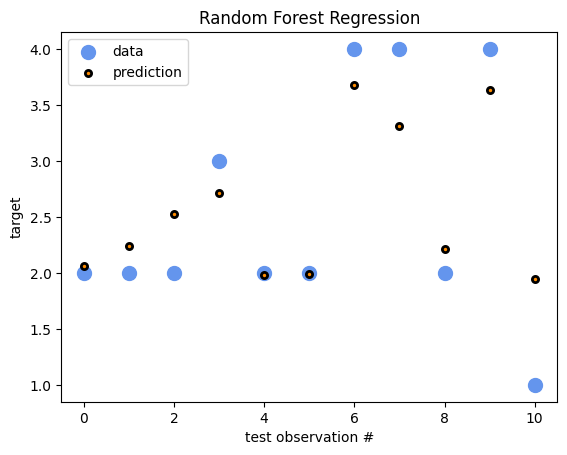

In [ ]:
# Plot the results
x_ax = range(len(y_test))
plt.figure()
plt.scatter(x_ax, y_test, s=100, c="cornflowerblue", label="data")
plt.scatter(x_ax, RF_predict, s=20, edgecolor="black", color="darkorange", label="prediction", linewidth=2)
plt.xlabel("test observation #")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [ ]:
print("Model Accuracy: %.3f" % RF.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, RF.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.805
The mean squared error (MSE) on test set: 0.1899


In [ ]:
##get feature importance
feature_importance = RF.feature_importances_

importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df
importance_df.to_csv('RandomForestRegressor_FeatureImportance.txt', index=True, sep='\t')
print(importance_df)

                        features  importance
12        Heterostegina depressa    0.485232
0         Textularia agglutinans    0.102770
16  Planorbulina mediterranensis    0.095443
4              Miliolinella spp.    0.058507
15    Pararotalia calcariformata    0.056661
19        Tretomphalus bulloides    0.036736
7          Amphistegina lobifera    0.031619
6    Sigmamiliolinella australis    0.024740
8             Cymbaloporetta sp.    0.022902
11     Epistomaroides punctulata    0.022662
13          Lenticulina cultrata    0.018113
14            Neoconorbina sp. 1    0.012050
2               Hauerina diversa    0.010822
5            Peneroplis pertusus    0.008568
10       Discorbis vilardeboanus    0.008196
3        Miliolinella subrotunda    0.004977
9          Discorbis globularis     0.000000
1            Textularia truncata    0.000000
17           Rosalina floridana     0.000000
18                  Rosalina sp.    0.000000


In [ ]:
# first decision tree
RF_estimator = RF.estimators_[50]
print(RF_estimator)

DecisionTreeRegressor(max_depth=3, max_features=1.0, random_state=104081697)


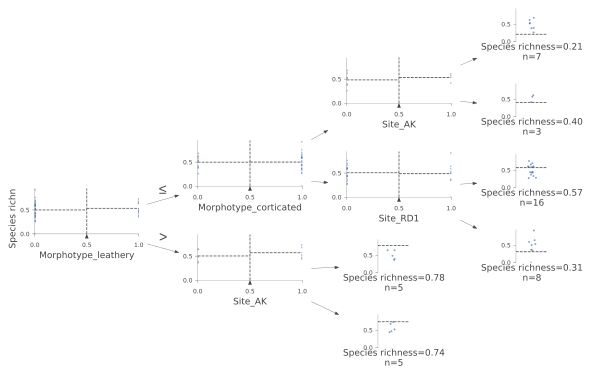

In [ ]:
viz_RFmodel = dtreeviz.model(model=RF_estimator,
                            X_train=X_train,
                            y_train=y_train,
                            feature_names=feature_list,
                            target_name="PC_1")
viz_rmodel.view(orientation="LR")

In [ ]:
##GradientBoost Model
reg1_params = {'n_estimators': 220,
          'max_depth': 3,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'absolute_error'}
#
# Create an instance of gradient boosting regressor
#
reg1 = GradientBoostingRegressor(**reg1_params)
#
# Fit the model
#
reg1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          n_estimators=220)

In [ ]:
print("Model Accuracy: %.3f" % reg1.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, reg1.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: -0.590
The mean squared error (MSE) on test set: 0.9167


In [ ]:
print(y_test)

14    1
37    2
6     3
26    3
7     3
8     3
33    2
16    1
38    3
39    2
50    3
29    3
Name: J_3classes, dtype: int64


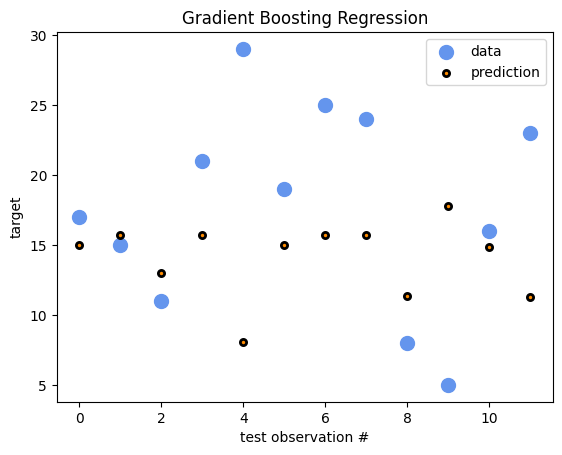

In [ ]:
y_pred = reg1.predict(X_test)

# Plot the results
x_ax = range(len(y_test))
plt.figure()
plt.scatter(x_ax, y_test, s=100, c="cornflowerblue", label="data")
plt.scatter(x_ax, y_pred, s=20, edgecolor="black", color="darkorange", label="prediction", linewidth=2)
plt.xlabel("test observation #")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = reg1.feature_importances_

importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df
print(importance_df)


                             features  importance
8                       Season_Summer    0.260772
13                Morphotype_leathery    0.163577
11              Morphotype_corticated    0.126430
5                        Depth_(m)_18    0.097385
4                         Depth_(m)_8    0.081112
2                            Site_SP1    0.078471
1                            Site_RD1    0.072090
10  Morphotype_articulated_calcareous    0.032375
6                         Season_Fall    0.030439
3                         Depth_(m)_5    0.025940
9                       Season_Winter    0.024589
0                             Site_AK    0.006155
7                       Season_Spring    0.000665
12      Morphotype_corticated_foliose    0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


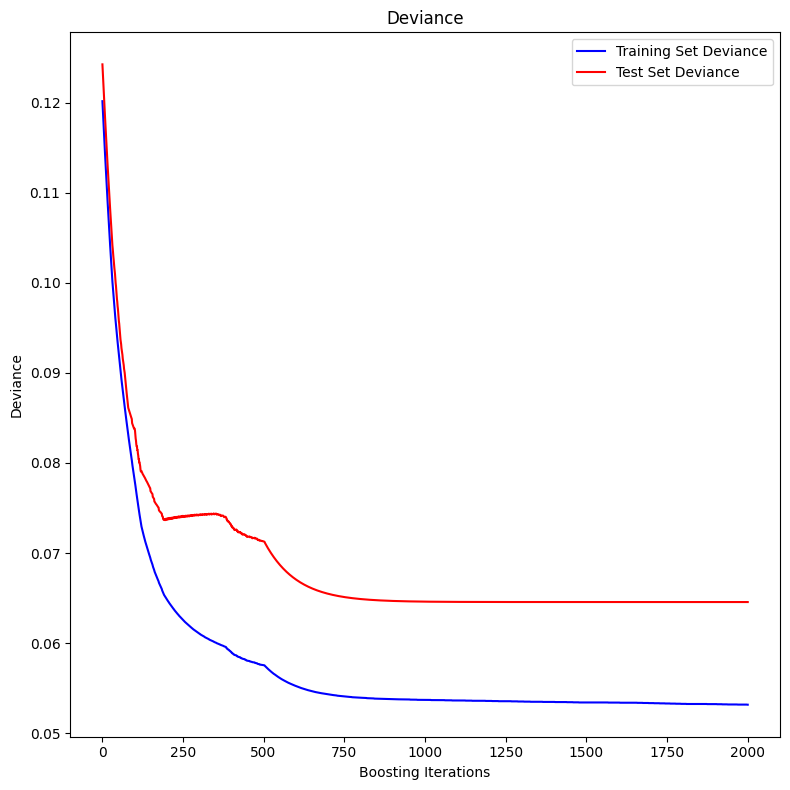

In [ ]:
test_score = np.zeros((reg1_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg1.staged_predict(X_test)):
    test_score[i] = reg1.loss_(y_test, y_pred)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(reg1_params['n_estimators']) + 1, reg1.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(reg1_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
score1 = reg1.score(X_train, y_train)
score2 = reg2.score(X_train, y_train)
score3 = reg3.score(X_train, y_train)

print(score1)

0.17993538655730612


In [ ]:
print(score2)

-0.5341782114063902


In [ ]:
print(score3)

-3.57728426395939


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


In [ ]:
##Lonear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.055347212704681
R-squared: -6.914467947375264


In [ ]:
##RANDOM FOREST CLASSIFIER

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, criterion ='gini', min_samples_leaf= 3)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

accuracy_train = accuracy_score(y_train, rf.predict(X_train))
print(f"Accuracy on training set: {accuracy_train:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.38
Accuracy on training set: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2

    accuracy                           0.38        13
   macro avg       0.28      0.44      0.29        13
weighted avg       0.30      0.38      0.29        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


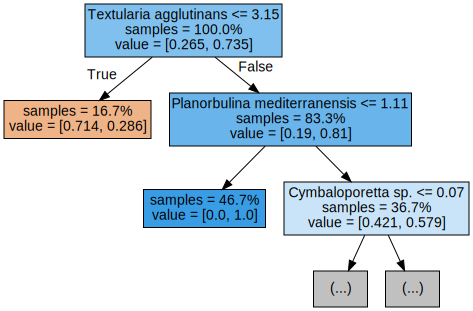

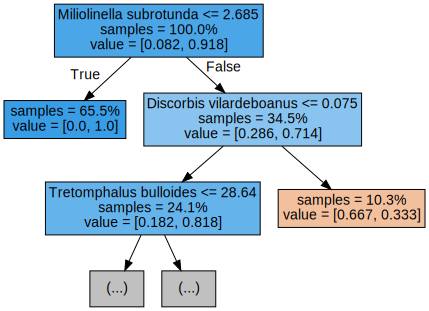

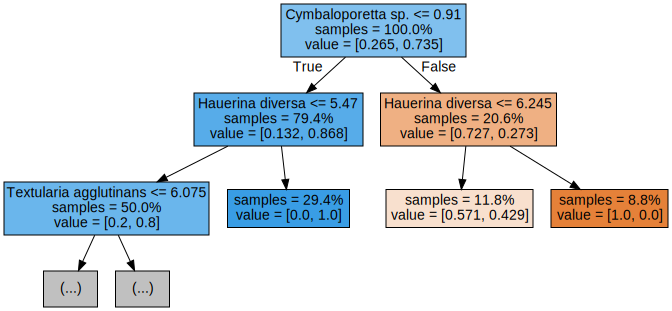

In [ ]:
##Visualization of trees
# Export the first three decision trees from the forest

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.save('tree'+str(i)+'.png')

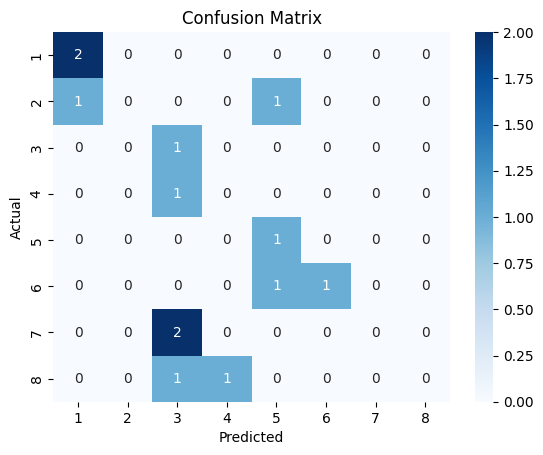

In [ ]:
##CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['1', '2', '3', '4', '5', '6', '7', '8'], yticklabels=['1', '2', '3', '4', '5', '6', '7', '8'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
# Fit the model on the entire dataset
rf.fit(X, Y)

# Extract feature importances
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df
importance_df.to_csv('RandomForestRegressor_FeatureImportance.txt', index=False, sep='\t')
print(importance_df)

                        features  importance
7          Amphistegina lobifera    0.169917
12        Heterostegina depressa    0.136487
0         Textularia agglutinans    0.134514
3        Miliolinella subrotunda    0.118023
19        Tretomphalus bulloides    0.075071
15    Pararotalia calcariformata    0.059697
8             Cymbaloporetta sp.    0.058771
2               Hauerina diversa    0.056779
5            Peneroplis pertusus    0.053695
4              Miliolinella spp.    0.032826
16  Planorbulina mediterranensis    0.031972
6    Sigmamiliolinella australis    0.019643
1            Textularia truncata    0.016179
11     Epistomaroides punctulata    0.012061
10       Discorbis vilardeboanus    0.008830
9          Discorbis globularis     0.007193
18                  Rosalina sp.    0.004960
14            Neoconorbina sp. 1    0.002911
17           Rosalina floridana     0.000427
13          Lenticulina cultrata    0.000046


In [ ]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2727272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6363636363636364


In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
SVC(decision_function_shape='ovo')
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6363636363636364


In [ ]:
##KNN neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5454545454545454


In [ ]:
##Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7272727272727273
